In [20]:
import sys; sys.path.insert(0, '../'); sys.path.insert(0, 'analysis_notes/mupClassification/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


# The impact of the cuts on $p_p$

In [21]:
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlayPairsFV,OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
print "%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay'

283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%
95259 cosmic pairs and 49707 mu-p pairs in overlay


In [22]:
cuts_order  = ['no cut','Chi2Proton' ,'Nflashes','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,cuts_order=cuts_order)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.7%,100.0%,12.9%,no cut,100.0% (49707),100.0% (41519),100.0% (95259),100.0% (23996)
Chi2Proton,63.1%,70.7%,68.7%,37.1%,Chi2Proton,63.1% (31389),19.3% (8021),5.2% (5001),68.7% (16481)
Nflashes,62.9%,72.6%,68.4%,38.1%,Nflashes,62.9% (31245),19.2% (7982),4.0% (3820),68.4% (16406)
MatchedFlash,51.6%,78.1%,56.3%,41.2%,MatchedFlash,51.6% (25634),13.2% (5491),1.8% (1688),56.3% (13510)
length,47.2%,83.5%,52.5%,44.8%,length,47.2% (23459),7.9% (3281),1.4% (1369),52.5% (12600)
non-collinearity,43.1%,87.4%,49.7%,48.7%,non-collinearity,43.1% (21412),5.8% (2409),0.7% (673),49.7% (11926)
vertex activity,31.0%,89.1%,44.2%,61.5%,vertex activity,31.0% (15391),3.7% (1538),0.4% (346),44.2% (10616)
delta phi,20.6%,95.3%,33.7%,75.2%,delta phi,20.6% (10241),0.9% (382),0.1% (118),33.7% (8080)
Pt & delta phi,18.2%,96.3%,30.4%,77.8%,Pt & delta phi,18.2% (9035),0.7% (270),0.1% (79),30.4% (7304)


In [33]:
overlay_no_FV = pd.read_csv(vertices_files_path+'/'+versions['overlay date']+'/'+versions['Overlay']+'_'+versions['overlay date']+'_vertices.csv')
overlay_no_FV_cc1p0pi = overlay_no_FV[overlay_no_FV['CC 1p 0pi']==True]
print 'len(overlay_no_FV_cc1p0pi)'

len(overlay_no_FV_cc1p0pi)


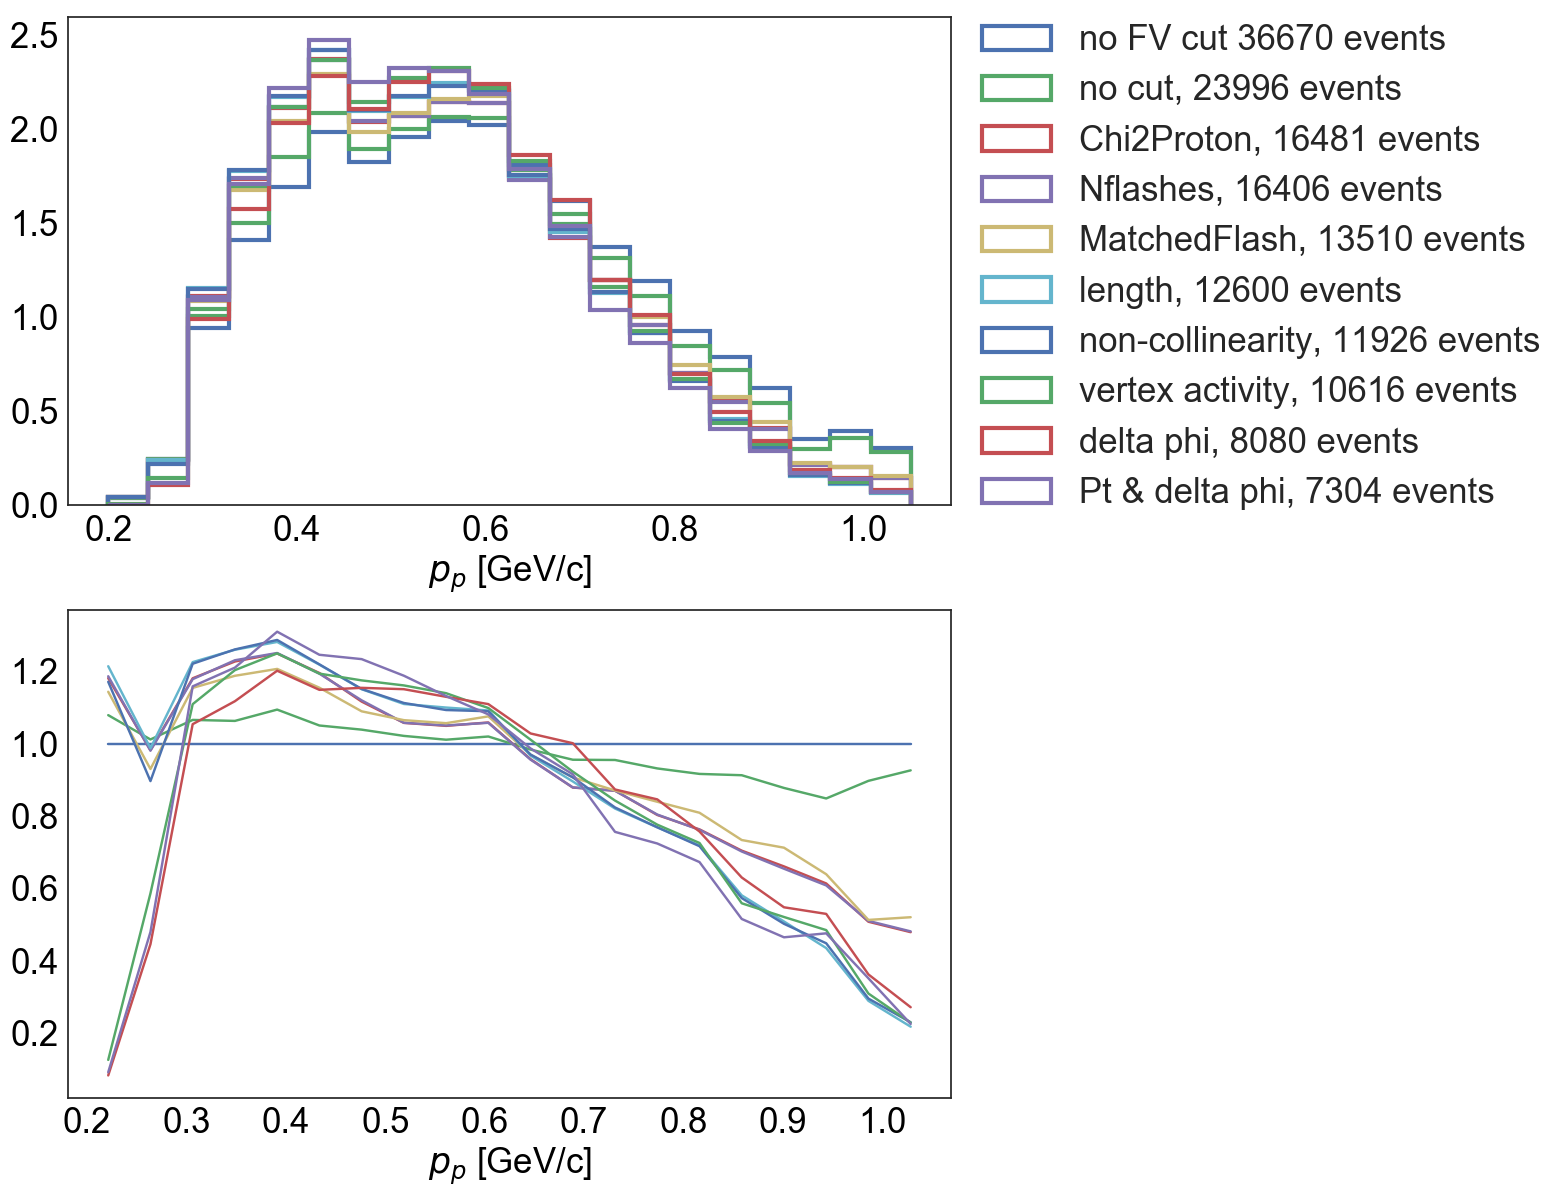

In [45]:
fig=plt.figure(figsize=(9.708,12))
h,ratio = dict(),dict()

bins = linspace(0.2,1.05,21);mid=0.5*(bins[1:]+bins[:-1])
ax = fig.add_subplot(2,1,1)
h['no FV'],_,_=plt.hist(overlay_no_FV_cc1p0pi['reco_Pp'],bins=bins,histtype='step',linewidth=3,label='no FV cut %d events'%len(overlay_no_FV_cc1p0pi),normed=1)
ratio['no FV'] = h['no FV']/h['no FV']
for cut in cuts_order:
    sam = reducedOverlay[cut]['CC 1p 0pi']
    h[cut],_,_=plt.hist(sam['reco_Pp'],bins=bins,histtype='step',linewidth=3
             ,label=(cut+', %d events'%len(sam)),normed=1)
    ratio[cut] = h[cut]/h['no FV']
set_axes(ax,r'$p_p$ [GeV/c]',do_add_legend=False)
plt.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)


ax = fig.add_subplot(2,1,2)
plt.plot(mid,ratio['no FV'],label='no FV')
for cut in cuts_order:
    plt.plot(mid,ratio[cut],label=cut)
set_axes(ax,r'$p_p$ [GeV/c]',do_add_legend=False)
plt.tight_layout()

# afro' GENIE samples - mimicking the detector volume

In [9]:
genie = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/afro_genie_samples/CC_100k_mA_0.99.csv')
len(genie)

100000

In [16]:
genie_cc1p0pi = genie[genie.IsCC_1p_200MeVc_0pi == True]
print len(cc1p0pi),'cc1p0pi'
genie_cc1p0pi_FV = sample_in_FV(sample=cc1p0pi)
genie_cc1p0pi_cuts = genie_cc1p0pi_FV[genie_cc1p0pi_FV['reco_l_mu']>genie_cc1p0pi_FV['reco_l_p']]
print len(genie_cc1p0pi_cuts),'genie cc1p0π after cuts'

34849 cc1p0pi
10983 genie cc1p0π after cuts


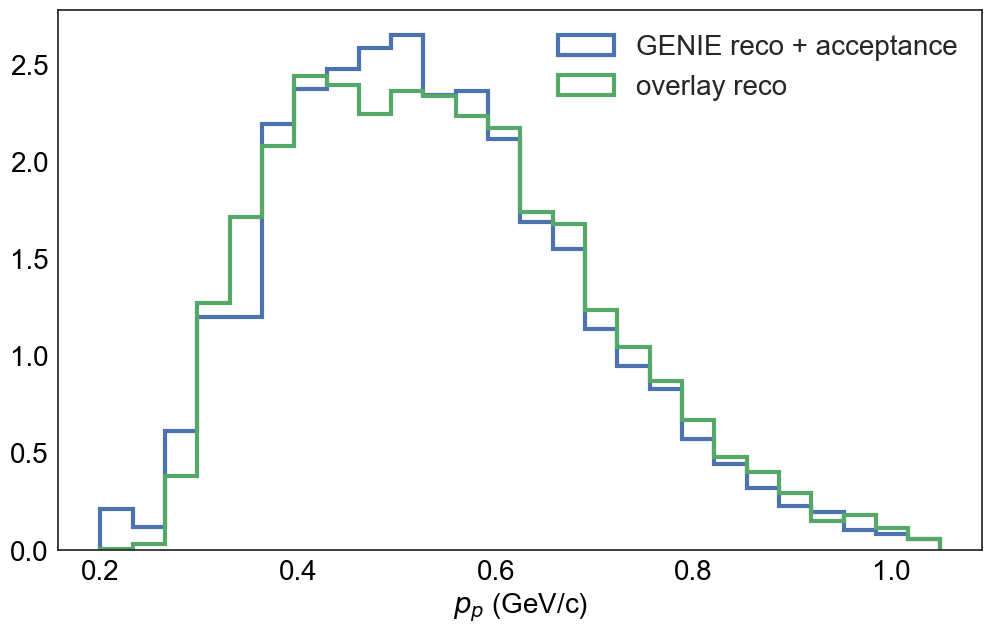

In [54]:
fig=plt.figure(figsize=(19.416,12))

for ivar,(var,x_label,bins) in enumerate(zip(['Pp']#,'Pp_theta','Pmu','Pmu_theta']                                        
                                             ,[r'$p_p$ (GeV/c)',r'$\theta_p$ (rad)',r'$p_\mu$ (GeV/c)',r'$\theta_\mu$ (rad)']
                                             ,[linspace(0.2,1.05,27),linspace(0,np.pi/2,50),linspace(0.1,1.2,50),linspace(0,2*np.pi/3,50)])):
    ax=fig.add_subplot(2,2,ivar+1)
    
#     plt.hist(genie_cc1p0pi_cuts[var],bins=bins,histtype='step',linewidth=3,label='GENIE truth',normed=1)
#     plt.hist(genie_cc1p0pi[var],weights=genie_cc1p0pi['MicroBooNEWeight_Pmu_theta_Pp_theta'],bins=bins,histtype='step',linewidth=3,label='GENIE truth + acceptance',normed=1)
#     plt.hist(genie_cc1p0pi_cuts['reco_'+var],bins=bins,histtype='step',linewidth=3,label='GENIE reco',normed=1)
    plt.hist(genie_cc1p0pi['reco_'+var],weights=genie_cc1p0pi['MicroBooNEWeight_Pmu_theta_Pp_theta'],bins=bins,histtype='step',linewidth=3,label='GENIE reco + acceptance',normed=1)

    overlay_CC1p0pi=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_cc1p0pi.csv')
#     plt.hist(overlay_CC1p0pi['truth_'+var],bins=bins,histtype='step',linewidth=3,label='overlay truth',normed=1)
    plt.hist(overlay_CC1p0pi['reco_'+var],bins=bins,histtype='step',linewidth=3,label='overlay reco',normed=1)

    set_axes(ax,x_label,do_add_legend=True if ivar==0 else False,fontsize=20)
    
plt.tight_layout()

# GENIE reco + acceptance looks similar to the overlay as a funciton of $p_p$ 
Can we use it?

In [ ]:
Where does it come from

In [ ]:
Where does it come from

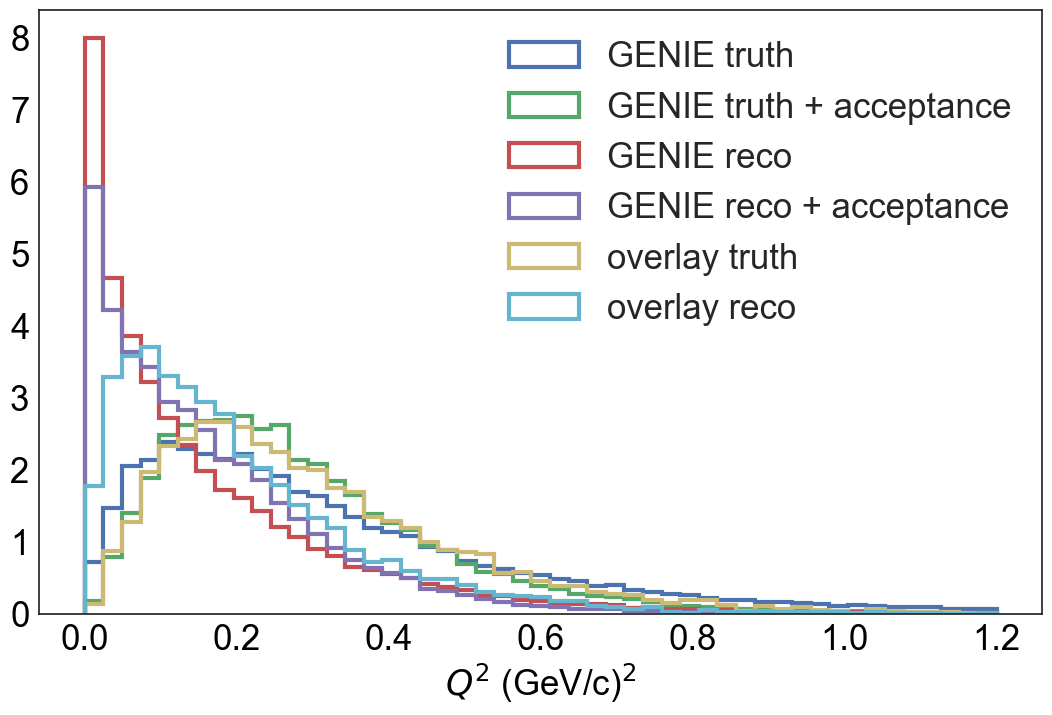

In [4]:
fig=plt.figure(figsize=(12.944,8))
ax=fig.add_subplot(1,1,1)
bins=linspace(0,1.2,50)
plt.hist(cc1p0pi_length_cut['Q2'],bins=bins,histtype='step',linewidth=3,label='GENIE truth',normed=1)
plt.hist(cc1p0pi_length_cut['Q2'],weights=cc1p0pi_length_cut['MicroBooNEWeight_Pmu_theta_Pp_theta'],bins=bins,histtype='step',linewidth=3,label='GENIE truth + acceptance',normed=1)
plt.hist(cc1p0pi_length_cut['reco_Q2'],bins=bins,histtype='step',linewidth=3,label='GENIE reco',normed=1)
plt.hist(cc1p0pi_length_cut['reco_Q2'],weights=cc1p0pi_length_cut['MicroBooNEWeight_Pmu_theta_Pp_theta'],bins=bins,histtype='step',linewidth=3,label='GENIE reco + acceptance',normed=1)

overlay_CC1p0pi=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_cc1p0pi.csv')
plt.hist(overlay_CC1p0pi['truth_Q2'],bins=bins,histtype='step',linewidth=3,label='overlay truth',normed=1)
plt.hist(overlay_CC1p0pi['reco_Q2'],bins=bins,histtype='step',linewidth=3,label='overlay reco',normed=1)

set_axes(ax,r'$Q^2$ (GeV/c)$^2$',do_add_legend=True)

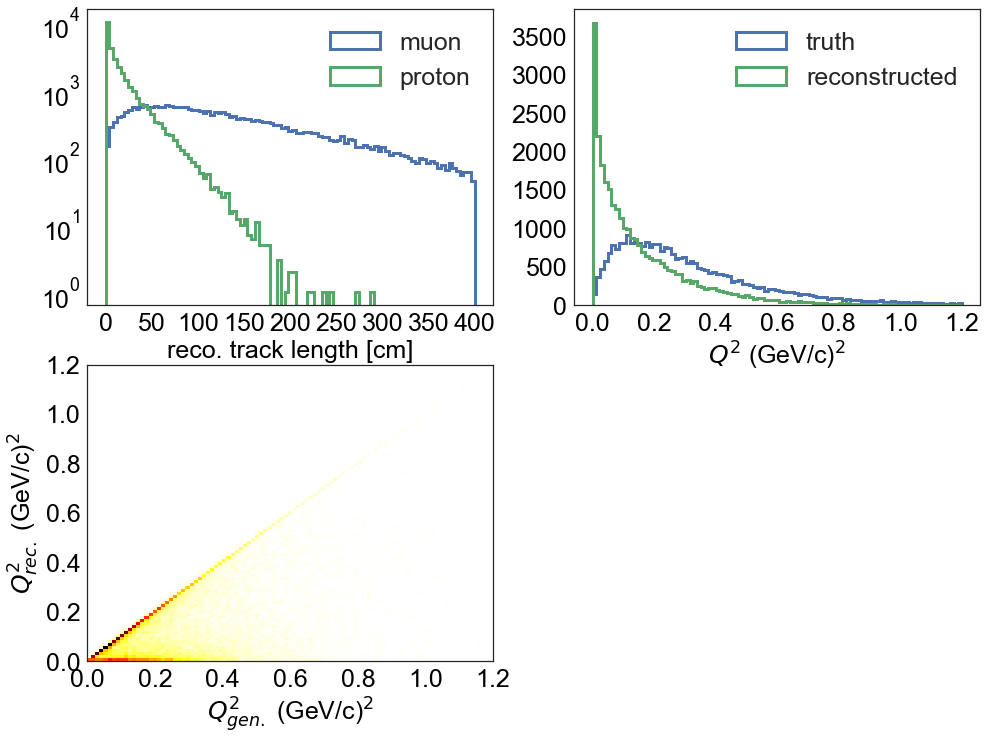

In [4]:
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(2,2,1)
for particle,plabel in zip(['mu','p'],['muon','proton']):
    plt.hist(cc1p0pi_length_cut['reco_l_'+particle],bins=linspace(0,400,100),histtype='step',linewidth=3,label=plabel)
set_axes(ax,r'reco. track length [cm]',do_add_legend=True)
ax.set_yscale('log')

ax=fig.add_subplot(2,2,2)
plt.hist(cc1p0pi_length_cut['Q2'],bins=linspace(0,1.2,100),histtype='step',linewidth=3,label='truth')
plt.hist(cc1p0pi_length_cut['reco_Q2'],bins=linspace(0,1.2,100),histtype='step',linewidth=3,label='reconstructed')
set_axes(ax,r'$Q^2$ (GeV/c)$^2$',do_add_legend=True)


ax=fig.add_subplot(2,2,3)
plot_2d_hist(cc1p0pi_length_cut['Q2'],cc1p0pi_length_cut['reco_Q2'],bins=linspace(0,1.2,100)
             ,xlabel=r'$Q^2_{gen.}$ (GeV/c)$^2$',ylabel=r'$Q^2_{rec.}$ (GeV/c)$^2$',ax=ax);

# event weight

In [2]:
ovrelay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates//prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_06_21_vertices.csv')
genie = pd.read_csv('/Users/erezcohen/Desktop/Temporary/prodgenie_bnb_nu_uboone_overlay_mcc8.11_genie.csv')

In [3]:
overlay_genie_CC1p0pi=genie[genie['IsCC_1p_200MeVc_0pi']==True]

In [4]:
mup = ovrelay[ovrelay['1mu-1p']==True]

170 mA= 0.4 with weight=1
680 mA= 0.4 with weight!=1
170 mA= 0.7 with weight=1
680 mA= 0.7 with weight!=1
850 mA= 0.99 with weight=1
0 mA= 0.99 with weight!=1
172 mA= 1.35 with weight=1
678 mA= 1.35 with weight!=1
172 mA= 1.71 with weight=1
678 mA= 1.71 with weight!=1


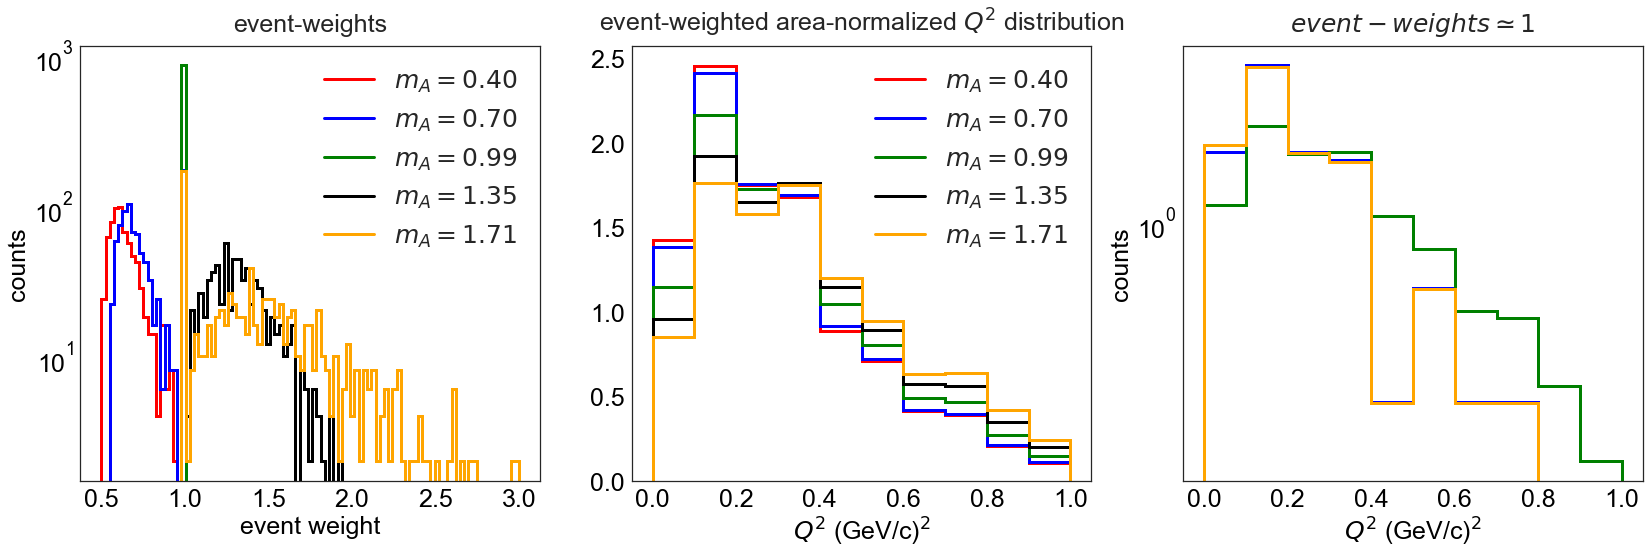

In [15]:
fig=plt.figure(figsize=(28,8))

ax=fig.add_subplot(1,3,1)
bins=linspace(0.5,3,100)
x_label=r'$Q^2$ (GeV/c)$^2$'
ones = dict()
for mA,name,color in zip([0.40,0.70,0.99,1.35,1.71]
                   ,['040','070','099','135','171']
                         ,['red','blue','green','black','orange']):
    ones[mA] = overlay_genie_CC1p0pi[np.abs(overlay_genie_CC1p0pi['evwgh_mA'+name+'_Genie']-1)<0.01]
    print len(ones[mA]),'mA=',mA,'with weight=1'
    print len(overlay_genie_CC1p0pi[np.abs(overlay_genie_CC1p0pi['evwgh_mA'+name+'_Genie']-1)>0.01]),'mA=',mA,'with weight!=1'

    plt.hist(overlay_genie_CC1p0pi['evwgh_mA'+name+'_Genie'],bins=bins,histtype='step'
             ,linewidth=3#,normed=1
             ,label=None,color=color);
    plt.plot([0.5,0.5],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,'event weight','counts',do_add_legend=True,title='event-weights')
ax.set_yscale('log')


ax=fig.add_subplot(1,3,2)
bins=linspace(0,1,11)
x_label=r'$Q^2$ (GeV/c)$^2$'
for mA,name,color in zip([0.40,0.70,0.99,1.35,1.71]
                   ,['040','070','099','135','171']
                         ,['red','blue','green','black','orange']):
    plt.hist(overlay_genie_CC1p0pi['truth_Q2'],weights=overlay_genie_CC1p0pi['evwgh_mA'+name+'_Genie'],bins=bins,histtype='step'
             ,linewidth=3,normed=1
             ,label=None,color=color);
    plt.plot([0,0],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,x_label,'',do_add_grid=False,alpha_grid=1,do_add_legend=True,title='event-weighted area-normalized $Q^2$ distribution')




ax=fig.add_subplot(1,3,3)
for mA,name,color in zip([0.40,0.70,0.99,1.35,1.71]
                         ,['040','070','099','135','171']
                         ,['red','blue','green','black','orange']):
    plt.hist(ones[mA]['truth_Q2'],bins=bins,histtype='step'
             ,linewidth=3,normed=1
             ,label=None,color=color);
    plt.plot([0.5,0.5],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,x_label,'counts',do_add_legend=False,title='$event-weights\simeq 1$')
ax.set_yscale('log')

# GENIE samples

In [5]:
mA_array = [0.80,0.90,0.99,1.10,1.20,1.40]
genie_CC1p0pi = dict()
for mA in mA_array:
    genie_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/afro_genie_samples/CC_100k_mA_%.2f.csv'%mA)
    genie_CC1p0pi[mA] = genie_sample[genie_sample['IsCC_1p_200MeVc_0pi']==True]
    print len(genie_CC1p0pi[mA]),'CC1p0π events in GENIE samples with mA=%.2f'%mA

32163 CC1p0π events in GENIE samples with mA=0.80
33824 CC1p0π events in GENIE samples with mA=0.90
34849 CC1p0π events in GENIE samples with mA=0.99
36196 CC1p0π events in GENIE samples with mA=1.10
37239 CC1p0π events in GENIE samples with mA=1.20
38810 CC1p0π events in GENIE samples with mA=1.40


KeyError: 'evwgh_mA040'

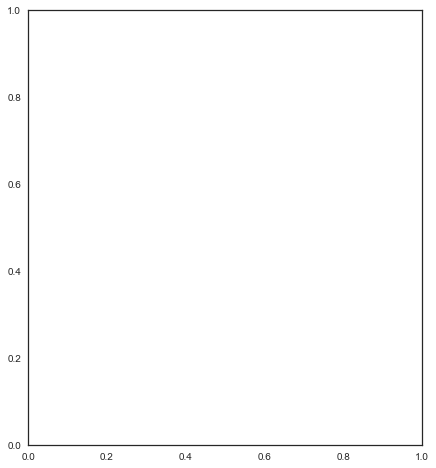

In [14]:
fig=plt.figure(figsize=(24,8))
ax=fig.add_subplot(1,3,1)
bins=linspace(0,1,21)
x_label=r'$Q^2$ (GeV/c)$^2$'
# plt.hist(overlay_genie_CC1p0pi['truth_Q2'],bins=bins,histtype='step'
#              ,linewidth=3#,normed=1
#              ,label='default',color='yellow');

for mA,name,color in zip([0.40,0.70,0.99,1.35,1.71]
                   ,['040','070','099','135','171']
                         ,['red','blue','green','black','orange']):
    plt.hist(overlay_genie_CC1p0pi['truth_Q2'],weights=overlay_genie_CC1p0pi['evwgh_mA'+name],bins=bins,histtype='step'
             ,linewidth=3#,normed=1
             ,label=None,color=color);
    plt.plot([0,0],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,x_label,'',do_add_grid=True,alpha_grid=1,do_add_legend=True,title='using event-weight on the same overlay')


ax=fig.add_subplot(1,3,2)
bins=linspace(0,1,21)
for mA,color in zip(mA_array
                    ,['red','blue','green','black','orange']):
    Q2 = genie_CC1p0pi[mA]['Q2']
    plt.hist(Q2,bins=bins,histtype='step',linewidth=3#,normed=1
             ,label=None,color=color);
    plt.plot([0,0],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,x_label,'',do_add_grid=True,alpha_grid=1,do_add_legend=True,title='GENIE samples (no detector)')


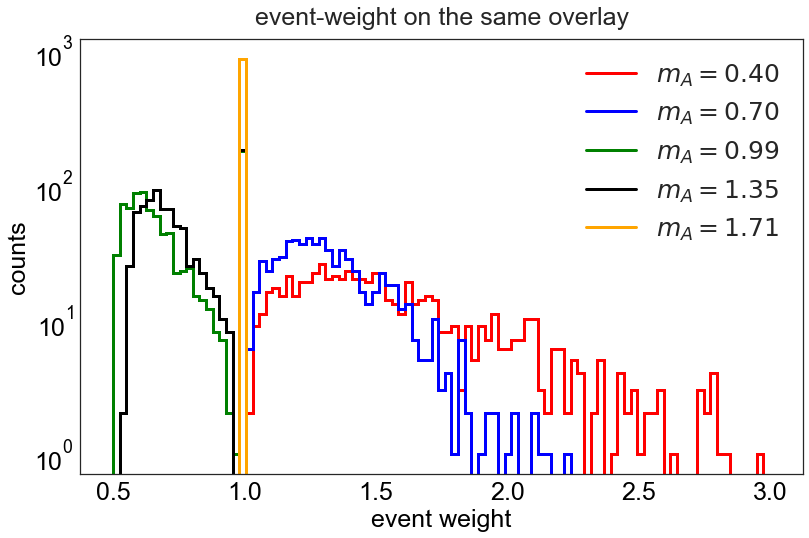

In [18]:
fig=plt.figure(figsize=(12.944,8))
ax=fig.add_subplot(1,1,1)
bins=linspace(0.5,3,100)
x_label=r'$Q^2$ (GeV/c)$^2$'
for mA,name,color in zip([0.40,0.70,0.99,1.35,1.71]
                   ,['040','070','099','135','171']
                         ,['red','blue','green','black','orange']):
    plt.hist(overlay_genie_CC1p0pi['evwgh_mA'+name],bins=bins,histtype='step'
             ,linewidth=3#,normed=1
             ,label=None,color=color);
    plt.plot([0.5,0.5],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,'event weight','counts',do_add_legend=True,title='event-weight on the same overlay')
ax.set_yscale('log')